In [1]:
import pandas as pd
import seaborn as sns; sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
import os
from IPython import display
from PIL import Image

### Metrics report

In [2]:
df = pd.DataFrame()

In [3]:
data_list = os.listdir("results/regular/")

In [4]:
for data in data_list:
    if ".csv" in data:
        new_df = pd.read_csv("results/regular/" + data)
        df = pd.concat([df, new_df], axis = 0).reset_index(drop=True)

In [5]:
#vqc_list = os.listdir("")
vqc_df = pd.read_csv("vqc_results/train_process/su2_cobyla_2.csv")
vqc_df["model"] = "VQC"
df = pd.concat([df, vqc_df], axis = 0).reset_index(drop=True)

In [6]:
df = df.fillna(0)
df

,f1_test,f1_train,prec_train,prec_test,recall_train,recall_test,elapsed,model,tau,C,feature_map_type,optimizer,objective_vals,Ansatz,Training time,Model,Max Iter,reps
0,0.869565,0.853691,0.834646,0.816327,0.873626,0.930233,933.720333,Pegasos QSVC,400.0,100.0,0,0,0,0,0.000000,0,0.0,0.0
1,0.843931,0.881598,0.916914,0.839080,0.848901,0.848837,10124.409601,QSVC,0.0,0.0,0,0,0,0,0.000000,0,0.0,0.0
2,0.826347,0.920821,0.987421,0.851852,0.862637,0.802326,0.008134,Decision Tree,0.0,0.0,0,0,0,0,0.000000,0,0.0,0.0
3,0.850575,0.860795,0.891176,0.840909,0.832418,0.860465,0.014716,Logistic Regression,0.0,0.0,0,0,0,0,0.000000,0,0.0,0.0
4,0.817610,0.821374,0.924399,0.890411,0.739011,0.755814,0.004888,Naive Bayes,0.0,0.0,0,0,0,0,0.000000,0,0.0,0.0
5,0.848837,0.916185,0.966463,0.848837,0.870879,0.848837,0.197358,Random Forest,0.0,0.0,0,0,0,0,0.000000,0,0.0,0.0
6,0.852071,0.876274,0.931889,0.867470,0.826923,0.837209,0.107552,SVC,0.0,0.0,0,0,0,0,0.000000,0,0.0,0.0
7,0.831325,0.823022,0.864048,0.862500,0.785714,0.802326,3433.498191,VQC,0.0,0.0,Pauli,cobyla,"[1.0329771903191045, 1.061389157689562, 1.0332...",su2,3433.498191,VQC,250.0,2.0


In [7]:
df["data"] = "raisin"

In [8]:
df.to_csv("../data_for_paper/performance_raisin.csv", index=False)

In [9]:
f1 = df[["model", "f1_train", "f1_test"]]
f1

,model,f1_train,f1_test
0,Pegasos QSVC,0.853691,0.869565
1,QSVC,0.881598,0.843931
2,Decision Tree,0.920821,0.826347
3,Logistic Regression,0.860795,0.850575
4,Naive Bayes,0.821374,0.817610
5,Random Forest,0.916185,0.848837
6,SVC,0.876274,0.852071
7,VQC,0.823022,0.831325


In [10]:
prec = df[["model", "prec_train", "prec_test"]]
prec

,model,prec_train,prec_test
0,Pegasos QSVC,0.834646,0.816327
1,QSVC,0.916914,0.839080
2,Decision Tree,0.987421,0.851852
3,Logistic Regression,0.891176,0.840909
4,Naive Bayes,0.924399,0.890411
5,Random Forest,0.966463,0.848837
6,SVC,0.931889,0.867470
7,VQC,0.864048,0.862500


In [11]:
recall = df[["model", "recall_train", "recall_test"]]
recall

,model,recall_train,recall_test
0,Pegasos QSVC,0.873626,0.930233
1,QSVC,0.848901,0.848837
2,Decision Tree,0.862637,0.802326
3,Logistic Regression,0.832418,0.860465
4,Naive Bayes,0.739011,0.755814
5,Random Forest,0.870879,0.848837
6,SVC,0.826923,0.837209
7,VQC,0.785714,0.802326


### Confusion Matrix Report

In [12]:
conf_list = os.listdir("conf")
for conf in conf_list:
    if "png" not in conf:
        conf_list.remove(conf)
conf_list

['nb.png',
 'lr.png',
 '.ipynb_checkpoints',
 'decision_tree.png',
 'rf.png',
 'qsvc.png',
 'qsvc_resized.png',
 'svc.png']

In [13]:
for i in range(len(conf_list)):
    if ".png" in conf_list[i]:
        conf_list[i] = "conf/" + conf_list[i]
conf_list

['conf/nb.png',
 'conf/lr.png',
 '.ipynb_checkpoints',
 'conf/decision_tree.png',
 'conf/rf.png',
 'conf/qsvc.png',
 'conf/qsvc_resized.png',
 'conf/svc.png']

In [14]:
conf_list.append("conf/pegasos_conf_test/100_500.png")
conf_list.append("vqc_conf/vqc_best.png")

In [15]:
conf_list.remove(".ipynb_checkpoints")
conf_list

['conf/nb.png',
 'conf/lr.png',
 'conf/decision_tree.png',
 'conf/rf.png',
 'conf/qsvc.png',
 'conf/qsvc_resized.png',
 'conf/svc.png',
 'conf/pegasos_conf_test/100_500.png',
 'vqc_conf/vqc_best.png']

### SVC Family Report

In [16]:
feature_list = os.listdir("results/runtime_features/")
feature_df = pd.DataFrame()
for data in feature_list:
    if ".csv" in data:
        new_df = pd.read_csv("results/runtime_features/" + data)
        feature_df = pd.concat([feature_df, new_df], axis = 0).reset_index(drop=True)

In [17]:
feature_df["data"] = "raisin"
feature_df.to_csv("../data_for_paper/feature_runtime_svc_raisin.csv", index=False)

In [18]:
def svc_chart_gen_features():
    svc = feature_df[feature_df["model"].isin(["SVC_linear", "SVC_rbf"])]
    qsvc = feature_df[feature_df["model"]=="QSVC"]
    pegasos_qsvc = feature_df[feature_df["model"] =="Pegasos QSVC"]
    
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (20, 16))
    sns.lineplot(x = "num_features", y = "runtime", data = svc, hue = "model", ax = axes[0], marker="o")
    ax=axes[0]
    ax.set_title("SVC - Runtime vs Number of Features")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of Features", fontsize=10)
    sns.lineplot(x = "num_features", y = "runtime", data = qsvc, ax = axes[1], marker="o")
    ax = axes[1]
    ax.set_title("QSVC - Runtime vs Number of Features")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of Features", fontsize=10)
    sns.lineplot(x = "num_features", y = "runtime", data = pegasos_qsvc, ax = axes[2], marker="o")
    ax = axes[2]
    ax.set_title("Pegasos QSVC - Runtime vs Number of Features")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of Features", fontsize=10)

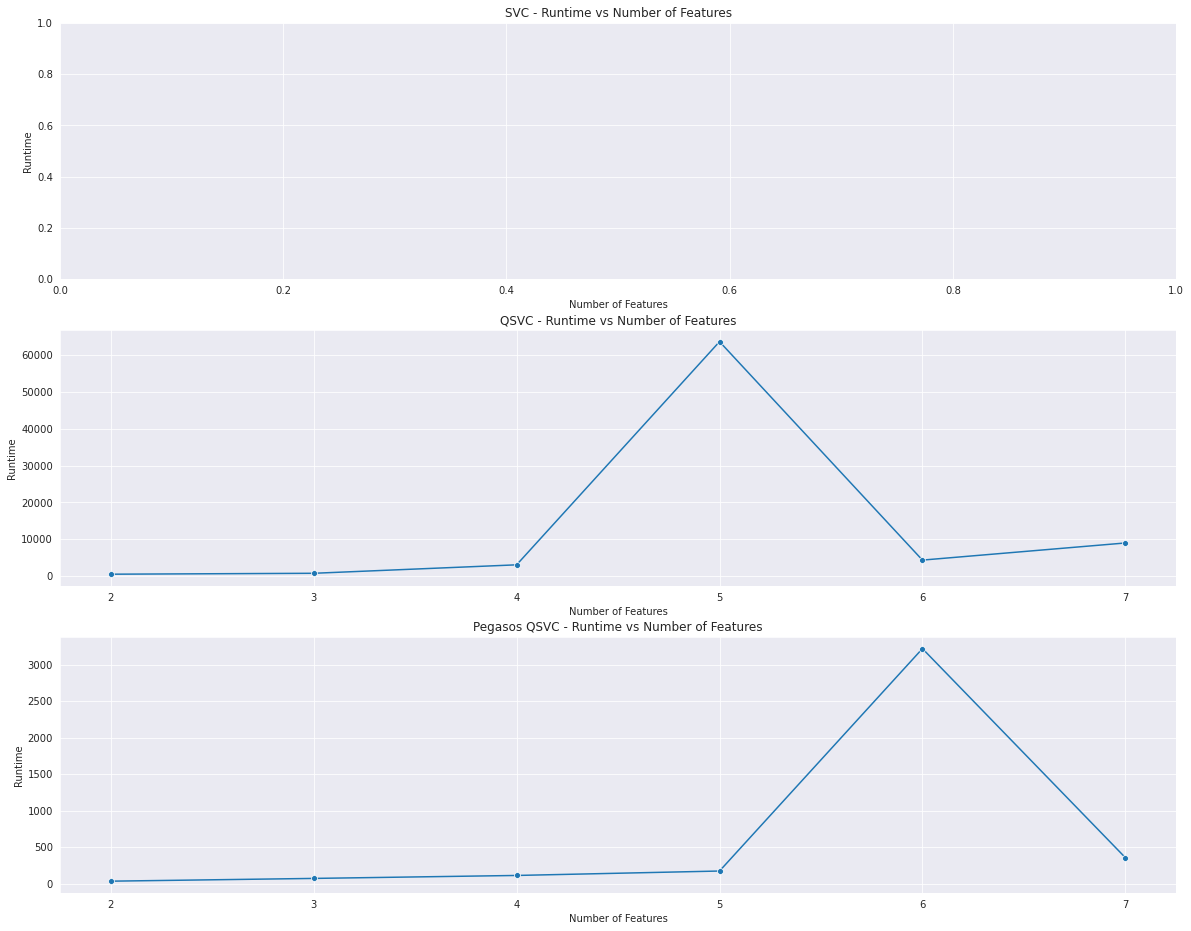

In [19]:
svc_chart_gen_features()

In [20]:
size_list = os.listdir("results/runtime_size/")
size_df = pd.DataFrame()
for data in size_list:
    if ".csv" in data:
        new_df = pd.read_csv("results/runtime_size/" + data)
        size_df = pd.concat([size_df, new_df], axis = 0).reset_index(drop=True)

In [21]:
size_df["data"] = "raisin"
size_df.to_csv("../data_for_paper/size_runtime_svc_raisin.csv", index=False)

In [22]:
def svc_chart_gen_size():
    svc = size_df[size_df["model"].isin(["SVC_linear", "SVC_rbf"])]
    qsvc = size_df[size_df["model"]=="QSVC"]
    pegasos_qsvc = size_df[size_df["model"] =="Pegasos QSVC"]
    
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (20, 16))
    sns.lineplot(x = "size", y = "runtime", data = svc, hue = "model", ax = axes[0], marker = "o")
    ax=axes[0]
    ax.set_title("SVC - Runtime vs Number of observations")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of observations", fontsize=10)
    sns.lineplot(x = "size", y = "runtime", data = qsvc, ax = axes[1], marker="o")
    ax = axes[1]
    ax.set_title("QSVC - Runtime vs Number of observations")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of observations", fontsize=10)
    sns.lineplot(x = "size", y = "runtime", data = pegasos_qsvc, ax = axes[2], marker="o")
    ax = axes[2]
    ax.set_title("Pegasos QSVC - Runtime vs Number of observations")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of observations", fontsize=10)

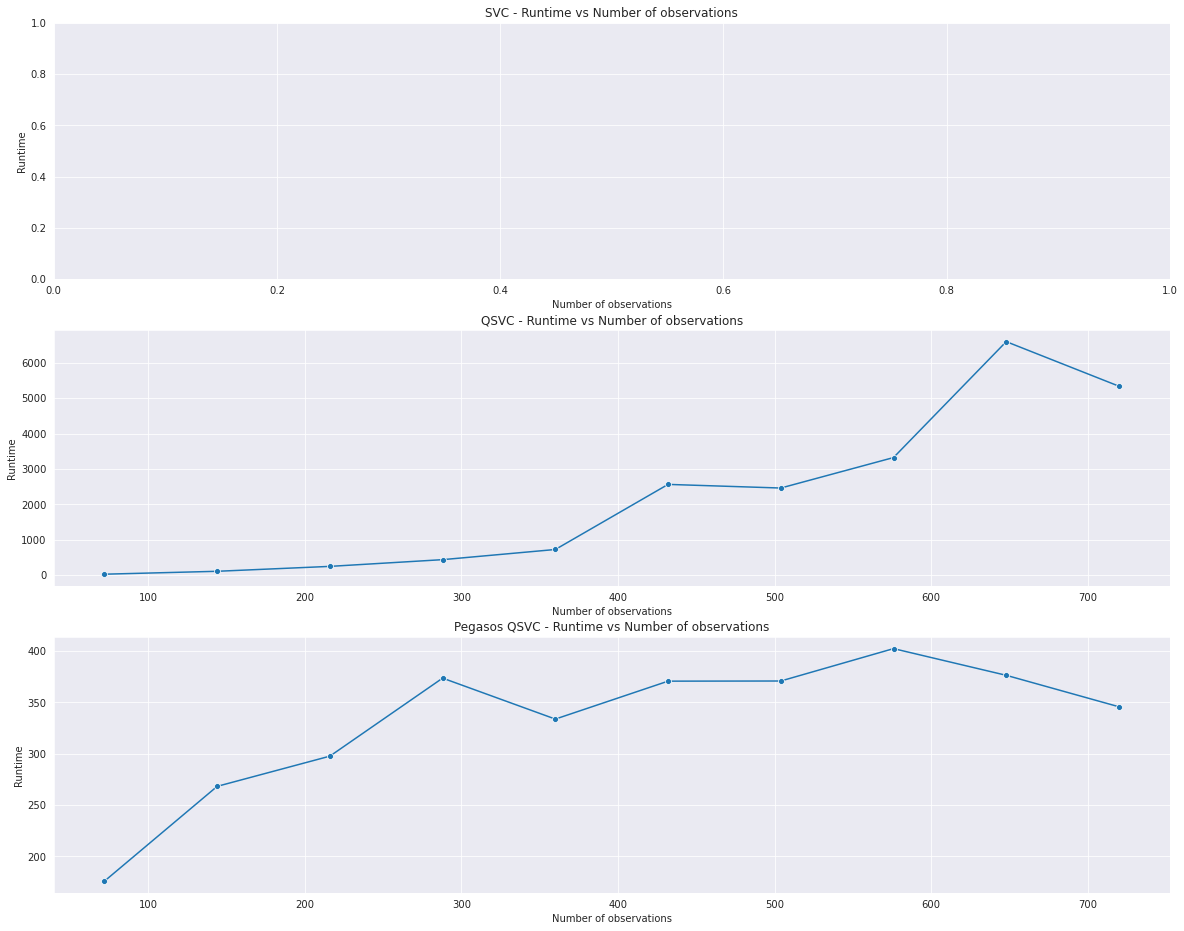

In [23]:
svc_chart_gen_size()

### VQC Report

In [24]:
vqc_feature_list = os.listdir("vqc_results/runtime_features/")
vqc_feature_df = pd.DataFrame()
for data in vqc_feature_list:
    if ".csv" in data:
        new_df = pd.read_csv("vqc_results/runtime_features/" + data)
        vqc_feature_df = pd.concat([vqc_feature_df, new_df], axis = 0).reset_index(drop=True)

In [25]:
vqc_feature_df["data"] = "raisin"
vqc_feature_df.to_csv("../data_for_paper/feature_runtime_vqc_raisin.csv", index=False)

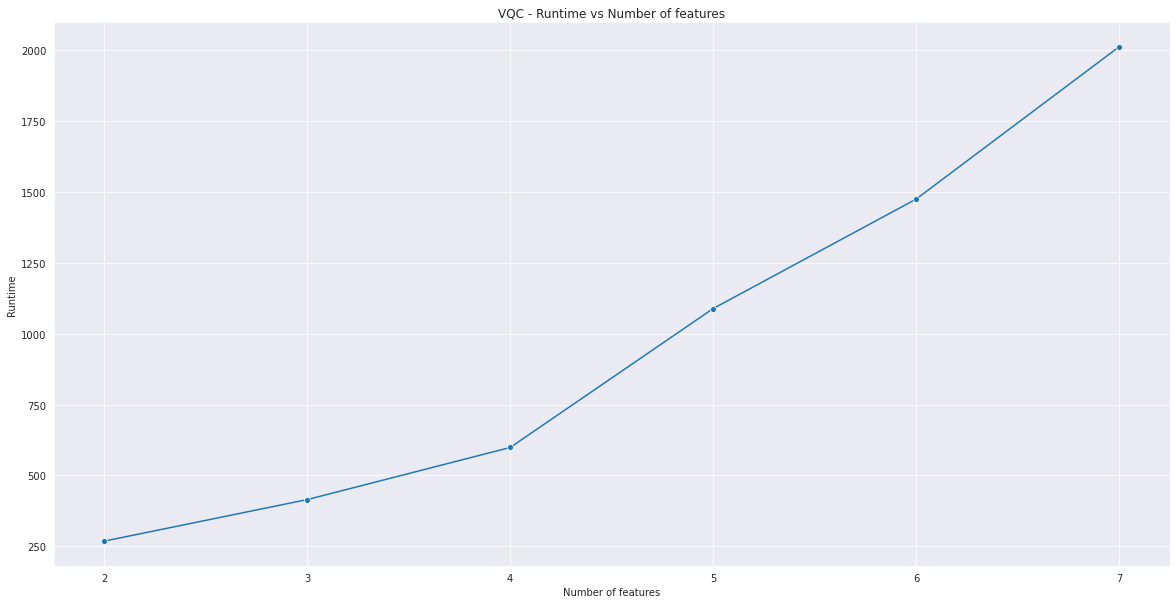

In [26]:
plt.figure(figsize=(20,10))
sns.lineplot(x = "num_features", y = "runtime", data = vqc_feature_df, marker = "o")
#ax = axes[1]
plt.title("VQC - Runtime vs Number of features")
plt.ylabel("Runtime", fontsize=10)
plt.xlabel("Number of features", fontsize=10)
plt.show();

In [27]:
vqc_size_list = os.listdir("vqc_results/runtime_size/")
vqc_size_df = pd.DataFrame()
for data in vqc_size_list:
    if ".csv" in data:
        new_df = pd.read_csv("vqc_results/runtime_size/" + data)
        vqc_size_df = pd.concat([vqc_size_df, new_df], axis = 0).reset_index(drop=True)

In [28]:
vqc_size_df["data"] = "raisin"
vqc_size_df.to_csv("../data_for_paper/size_runtime_vqc_raisin.csv", index=False)

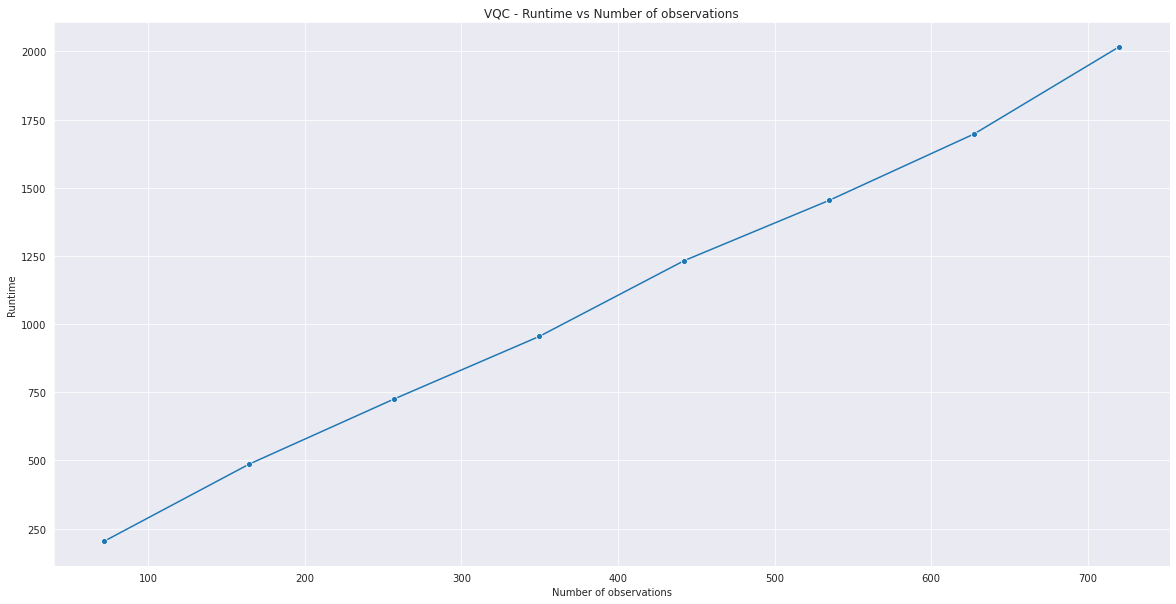

In [29]:
plt.figure(figsize=(20,10))
sns.lineplot(x = "size", y = "runtime", data = vqc_size_df, marker="o")
#ax = axes[1]
plt.title("VQC - Runtime vs Number of observations")
plt.ylabel("Runtime", fontsize=10)
plt.xlabel("Number of observations", fontsize=10)
plt.show();